In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_P_grid_single_row(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                          param_values=None, param_range=(-2, 2), param_steps=5,
                          size_settings=None):
    """
    Flexible grid analysis plot for p_0, p_k, p_p values.
    ALL PLOTS IN A SINGLE STRAIGHT LINE (ROW).
    
    Parameters:
    -----------
    dfp : pandas DataFrame
        Input data with p_0, p_k, p_p columns
    x_axis : str
        Parameter for x-axis ('alpha', 'beta', or 'gamma')
    y_axis : str
        Parameter for y-axis ('alpha', 'beta', or 'gamma')
    sep_plots : str
        Parameter for separate subplots ('alpha', 'beta', or 'gamma')
    param_values : list or dict
        Custom parameter values. Can be:
        - List of values: [-2, -1, 1, 2]
        - Dict: {'alpha': [...], 'beta': [...], 'gamma': [...]}
        If None, uses param_range and param_steps
    param_range : tuple
        Range for parameter values (default: (-2, 2))
    param_steps : int
        Number of steps for parameter grid (default: 5)
    size_settings : dict
        Custom size settings. If None, uses defaults.
    """
    
    # Define parameter columns
    param_cols = ['alpha', 'beta', 'gamma']
    
    # Validate inputs
    for param in [x_axis, y_axis, sep_plots]:
        if param not in param_cols:
            raise ValueError(f"Parameter must be one of {param_cols}, got '{param}'")
    
    if x_axis == y_axis or x_axis == sep_plots or y_axis == sep_plots:
        raise ValueError("x_axis, y_axis, and sep_plots must be different parameters")
    
    # Handle parameter values
    param_vals = {}
    
    if param_values is None:
        # Use linear spacing
        for param in param_cols:
            param_vals[param] = np.linspace(param_range[0], param_range[1], param_steps)
    
    elif isinstance(param_values, dict):
        # Custom values for each parameter
        for param in param_cols:
            if param in param_values:
                param_vals[param] = np.array(param_values[param])
            else:
                param_vals[param] = np.linspace(param_range[0], param_range[1], param_steps)
    
    elif isinstance(param_values, (list, np.ndarray)):
        # Same values for all parameters
        for param in param_cols:
            param_vals[param] = np.array(param_values)
    
    else:
        raise ValueError("param_values must be None, list, or dict")
    
    # Get values for each axis
    x_values = param_vals[x_axis]
    y_values = param_vals[y_axis]
    sep_values = param_vals[sep_plots]
    
    n_sep = len(sep_values)
    n_x = len(x_values)
    n_y = len(y_values)
    
    print(f"Grid configuration:")
    print(f"X-axis ({x_axis}): {x_values}")
    print(f"Y-axis ({y_axis}): {y_values}")
    print(f"Separate plots ({sep_plots}): {sep_values}")
    print(f"Grid size: {n_sep} × {n_y} × {n_x}")
    
    # Set size settings
    if size_settings is None:
        # Auto-adjust based on number of subplots
        if n_sep <= 5:
            base_width = 6  # Width per subplot
            base_height = 7  # Fixed height
            cell_font_size = 14
            axis_font_size = 16
            title_font_size = 16
            suptitle_font_size = 22
        elif n_sep <= 8:
            base_width = 5
            base_height = 6
            cell_font_size = 12
            axis_font_size = 14
            title_font_size = 14
            suptitle_font_size = 20
        else:
            base_width = 4
            base_height = 5
            cell_font_size = 10
            axis_font_size = 12
            title_font_size = 12
            suptitle_font_size = 18
    else:
        base_width = size_settings.get('base_width', 6)
        base_height = size_settings.get('base_height', 7)
        cell_font_size = size_settings.get('cell_font_size', 14)
        axis_font_size = size_settings.get('axis_font_size', 16)
        title_font_size = size_settings.get('title_font_size', 16)
        suptitle_font_size = size_settings.get('suptitle_font_size', 22)
    
    # ALL PLOTS IN SINGLE ROW
    n_rows = 1
    n_cols = n_sep
    
    # Calculate figure size
    fig_width = base_width * n_cols
    fig_height = base_height
    
    print(f"\nFigure layout: Single row with {n_cols} plots")
    print(f"Figure size: {fig_width:.1f} × {fig_height:.1f} inches")
    
    # Create figure with ALL PLOTS IN SINGLE ROW
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    
    # Flatten axes for easier iteration (always single row)
    if n_cols == 1:
        axes = np.array([axes])
    else:
        axes = axes.flatten()
    
    # Thresholds for color coding
    count_threshold_high = 40
    count_threshold_medium = 20
    
    for plot_idx, sep_val in enumerate(sep_values):
        ax = axes[plot_idx]
        
        # Create grid for current subplot
        for i, y_val in enumerate(y_values):
            for j, x_val in enumerate(x_values):
                x_pos = j  # x-axis position
                y_pos = n_y - 1 - i  # y-axis position (inverted)
                
                # Create mask based on parameter values
                mask_conditions = []
                for param, value in zip([sep_plots, x_axis, y_axis], [sep_val, x_val, y_val]):
                    mask_conditions.append(dfp[param] == value)
                
                # Combine conditions
                mask = np.all(mask_conditions, axis=0)
                filtered_data = dfp.loc[mask]
                
                if not filtered_data.empty:
                    # Calculate means
                    mean_p0 = np.mean(filtered_data['p_0']) if 'p_0' in filtered_data.columns else np.nan
                    mean_pk = np.mean(filtered_data['p_k']) if 'p_k' in filtered_data.columns else np.nan
                    mean_pp = np.mean(filtered_data['p_p']) if 'p_p' in filtered_data.columns else np.nan
                    count = len(filtered_data)
                    
                    # Create annotation text - show count only
                    text = f"r={count}"
                    
                    # Color coding based on count
                    if count > count_threshold_high:
                        fc = 'green'
                    elif count > count_threshold_medium:
                        fc = 'orange'
                    else:
                        fc = 'red'
                    
                    # Add background rectangle
                    rect_width = 0.9
                    rect_height = 0.9
                    rect = plt.Rectangle((x_pos - rect_width/2, y_pos - rect_height/2), 
                                        rect_width, rect_height,
                                        facecolor=fc, edgecolor='black',
                                        alpha=0.7, linewidth=1.0)
                    ax.add_patch(rect)
                    
                    # Add text
                    ax.text(x_pos, y_pos, text,
                        ha='center', va='center',
                        fontsize=cell_font_size, 
                        fontweight='normal')
                else:
                    # No data
                    rect_width = 0.9
                    rect_height = 0.9
                    rect = plt.Rectangle((x_pos - rect_width/2, y_pos - rect_height/2), 
                                        rect_width, rect_height,
                                        facecolor='lightgray', edgecolor='gray',
                                        alpha=0.5, linewidth=1.0)
                    ax.add_patch(rect)
                    ax.text(x_pos, y_pos, "No Data",
                        ha='center', va='center',
                        fontsize=cell_font_size, 
                        color='gray', 
                        style='italic')
        
        # Set up the plot limits and ticks
        ax.set_xlim(-0.5, n_x - 0.5)
        ax.set_ylim(-0.5, n_y - 0.5)
        ax.set_xticks(np.arange(n_x))
        ax.set_yticks(np.arange(n_y))
        
        # Set title for subplot
        ax.set_title(f'{sep_plots}={sep_val:.1f}', 
                    fontsize=title_font_size, 
                    fontweight='bold', 
                    pad=10)
        
        # Add subtle grid
        ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)
        
        # Set axis labels
        # Y-axis labels for FIRST PLOT ONLY
        if plot_idx == 0:
            ax.set_ylabel(f'{y_axis}', 
                         fontsize=axis_font_size, 
                         fontweight='bold',
                         labelpad=8)
            ax.set_yticklabels([f'{v:.1f}' for v in y_values[::-1]], 
                              fontsize=axis_font_size - 2)
        else:
            ax.set_yticklabels([])
        
        # X-axis labels for ALL PLOTS
        ax.set_xlabel(f'{x_axis}', 
                     fontsize=axis_font_size, 
                     fontweight='bold',
                     labelpad=8)
        ax.set_xticklabels([f'{v:.1f}' for v in x_values], 
                          fontsize=axis_font_size - 2)
    
    # Add main title
    title_text = 'number of replications for each combination of alpha, beta, gamma'
    plt.suptitle(title_text, 
                fontsize=suptitle_font_size, 
                fontweight='bold', 
                y=0.95)
    
    # Add color legend at the bottom
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', alpha=0.7, 
              label=f'n > {count_threshold_high}'),
        Patch(facecolor='orange', edgecolor='black', alpha=0.7, 
              label=f'{count_threshold_medium} < n ≤ {count_threshold_high}'),
        Patch(facecolor='red', edgecolor='black', alpha=0.7, 
              label=f'n ≤ {count_threshold_medium}'),
        Patch(facecolor='lightgray', edgecolor='gray', alpha=0.5, 
              label='No data')
    ]
    
    # Place legend at the bottom, centered
    """fig.legend(handles=legend_elements, loc='lower center', 
              ncol=4, fontsize=10, 
              title='Replication(r))', title_fontsize=12,
              bbox_to_anchor=(0.5, -0.05))"""
    
    plt.tight_layout()
    # Adjust bottom margin for legend
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()
    
    # Return summary statistics
    return {
        'x_axis': x_axis,
        'y_axis': y_axis,
        'sep_plots': sep_plots,
        'x_values': x_values,
        'y_values': y_values,
        'sep_values': sep_values,
        'grid_size': f"{n_sep} × {n_y} × {n_x}",
        'figure_size': f"{fig_width:.1f} × {fig_height:.1f} inches"
    }


# Alternative: Wider single-row layout for better visibility
def plot_P_grid_single_row_wide(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                               param_values=None, param_range=(-2, 2), param_steps=5):
    """
    Single row layout with wider subplots for better visibility.
    """
    # Use wider subplots
    size_settings = {
        'base_width': 7,  # Wider subplots
        'base_height': 8,  # Slightly shorter
        'cell_font_size': 16,
        'axis_font_size': 18,
        'title_font_size': 18,
        'suptitle_font_size': 24
    }
    
    return plot_P_grid_single_row(dfp, 
                                  x_axis=x_axis, 
                                  y_axis=y_axis, 
                                  sep_plots=sep_plots,
                                  param_values=param_values,
                                  param_range=param_range,
                                  param_steps=param_steps,
                                  size_settings=size_settings)


# Helper functions for common configurations
def plot_P_alpha_single_row(dfp, param_values=None):
    """Convenience function: alpha as separate plots in single row, beta vs gamma"""
    return plot_P_grid_single_row(dfp, x_axis='beta', y_axis='gamma', sep_plots='alpha',
                                 param_values=param_values)

def plot_P_beta_single_row(dfp, param_values=None):
    """Convenience function: beta as separate plots in single row, alpha vs gamma"""
    return plot_P_grid_single_row(dfp, x_axis='alpha', y_axis='gamma', sep_plots='beta',
                                 param_values=param_values)

def plot_P_gamma_single_row(dfp, param_values=None):
    """Convenience function: gamma as separate plots in single row, alpha vs beta"""
    return plot_P_grid_single_row(dfp, x_axis='alpha', y_axis='beta', sep_plots='gamma',
                                 param_values=param_values)


# Example usage
if __name__ == "__main__":
    # Example 1: Original behavior with 4×4×4 grid in single row
    # summary1 = plot_P_alpha_single_row(results_1000, param_values=[-2, -1, 1, 2])
    
    # Example 2: With custom parameter values [-2, -1, 1, 2] in single row

    
    # Example 3: Beta as separate plots in single row, alpha vs gamma
    # summary3 = plot_P_beta_single_row(results_1000, param_values=[-2, -1, 0, 1, 2])
    
    # Example 4: Wider single-row layout
    # summary4 = plot_P_grid_single_row_wide(results_1000,
    #                                       x_axis='beta',
    #                                       y_axis='gamma',
    #                                       sep_plots='alpha',
    #                                       param_values=[-2, -1, 1, 2])
    
    # Example 5: Different values for different parameters
    # summary5 = plot_P_grid_single_row(results_1000,
    #                                   x_axis='beta',
    #                                   y_axis='gamma',
    #                                   sep_plots='alpha',
    #                                   param_values={
    #                                       'alpha': [-2, -1, 1, 2],
    #                                       'beta': [-1.5, -0.5, 0.5, 1.5],
    #                                       'gamma': [-2, 0, 2]
    #                                   })
    pass

In [2]:
results=pd.read_csv('results/results_zi_n=500_rep=1.csv')

Grid configuration:
X-axis (alpha): [-2 -1  0  1  2]
Y-axis (beta): [-2 -1  0  1  2]
Separate plots (gamma): [-2 -1  0  1  2]
Grid size: 5 × 5 × 5

Figure layout: Single row with 5 plots
Figure size: 30.0 × 7.0 inches


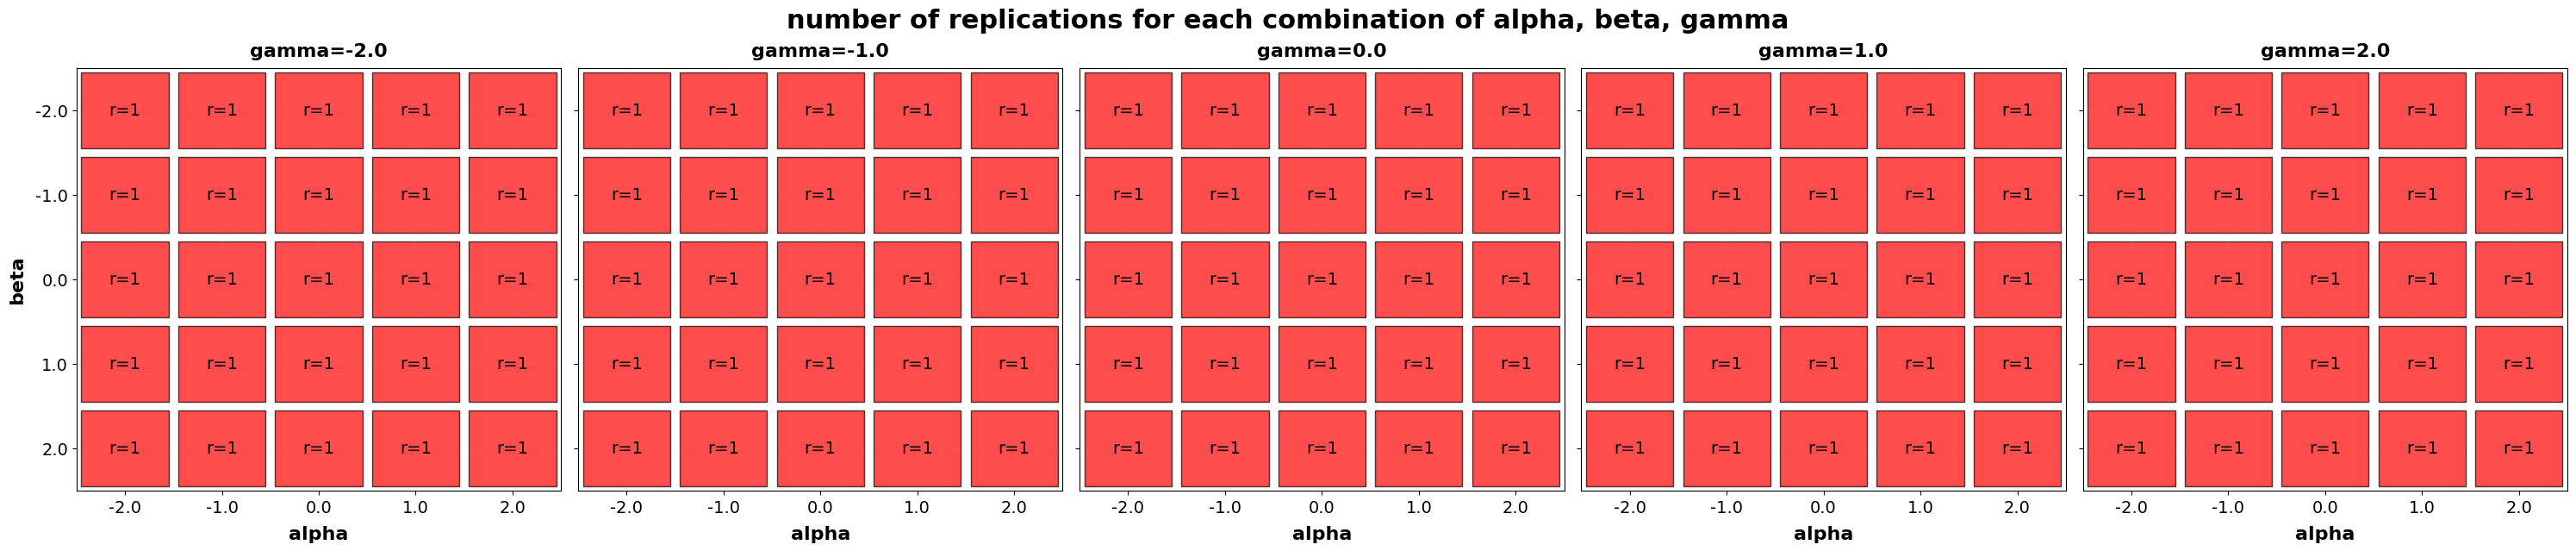

In [4]:
summary2 = plot_P_grid_single_row(results, 
                                       x_axis='alpha',
                                       y_axis='beta',
                                       sep_plots='gamma',
                                       param_values=[-2, -1, 0, 1, 2])